In [1]:
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

C:\Users\Akhil Sai\AppData\Local\Temp\ipykernel_31412\4092498629.py:51: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [2]:
df = pd.read_csv("./amazon_food_E_Commerce_Reviews.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,food ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,I have bought several of the Vitality canned d...,5,1,0,tasty,continental,indian
1,1080,34,NaN,Product arrived labeled as Jumbo Salted Peanut...,1,1,4,General,desert,desert
2,1077,60,Some major design flaws,This is a confection that has been around a fe...,4,0,0,General,desert,desert
3,1049,50,My favorite buy!,If you are looking for the secret ingredient i...,2,1,0,General large,chineses,spicy
4,847,47,Flattering shirt,Great taffy at a great price. There was a wid...,5,1,6,General,main_course,north indian


In [3]:
df.columns


Index(['food ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [4]:
# showing datatpes of whole dataset
df.dtypes

food ID                     int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
df.drop(df.columns[0],inplace=True,axis=1)

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]
    
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

print("Missing Values: {}".format(df.isnull().sum().sum())) #missing values
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

# Create New Variables: 
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)
# Character Length
df["Character Count"] = df['Review Text'].apply(len)

#describing al statistical values
df.describe()

Missing Values: 3
Dataframe Dimension: 19 Rows, 9 Columns


,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Character Count
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,42.210526,4.105263,0.842105,2.263158,51.842105,284.315789
std,9.192865,1.448936,0.374634,3.380370,37.562190,204.299631
min,24.000000,1.000000,0.000000,0.000000,15.000000,97.000000
25%,34.000000,4.000000,1.000000,0.000000,25.000000,140.000000
50%,41.000000,5.000000,1.000000,1.000000,41.000000,195.000000
75%,49.500000,5.000000,1.000000,3.500000,68.000000,363.500000
max,60.000000,5.000000,1.000000,14.000000,146.000000,779.000000


AttributeError: module 'matplotlib' has no attribute 'normpdf'

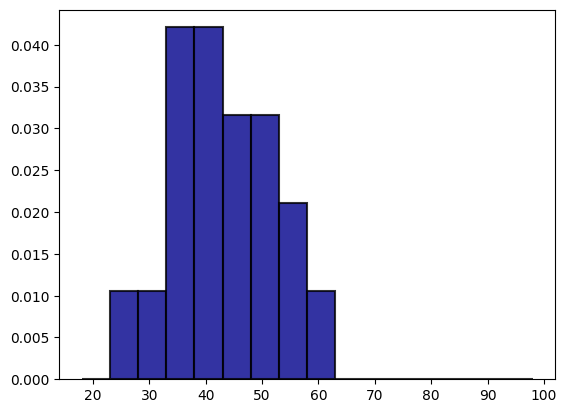

In [6]:
#Create bin to store ages
age_bin= np.arange(18, 100, 5)
#Average age
age_avg = np.average(df['Age'])
#age standard devation
age_std = np.std(df['Age'])

#Create histogram
plt.hist(df['Age'], bins = age_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add a fit
y = mpl.normpdf( age_bin, age_avg, age_std)
l = plt.plot(age_bin, y, 'r--', linewidth=1)

#Set x axis ticks to match bins
plt.xticks(age_bin)

#Add labels and title
plt.xlabel("Age")
plt.ylabel("Age Probability Density")
plt.title("Age Distribution")

#Add average line
plt.axvline(age_avg, color='green', linestyle = 'dashed', linewidth= 2)

#Use grey background
plt.style.use('bmh')

#Display histogram
plt.show()

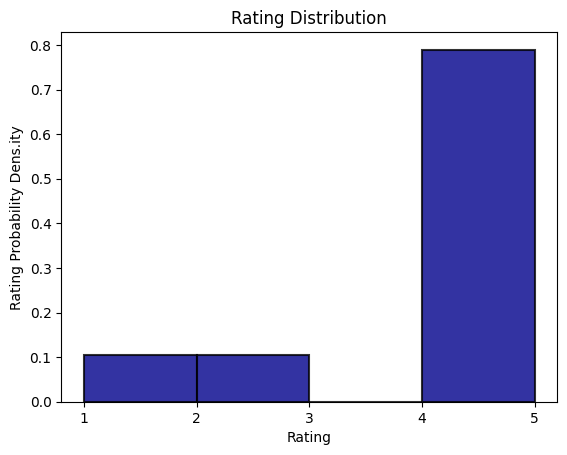

In [7]:
rating_bin = np.arange(1, 6, 1)

#Create histogram
plt.hist(df['Rating'], bins = rating_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add labels and title
plt.xlabel("Rating")
plt.ylabel("Rating Probability Dens.ity")
plt.title("Rating Distribution")

#Set x axis ticks to match bins
plt.xticks(rating_bin)

plt.show()

In [8]:
def NameCount (df_in, column):
    #Store unique entries 
    names = df_in[column].unique()
    #remove nans
    names = [x for x in names if str(x) != 'nan']
    #Create array to store values
    count = np.empty(len(names))
    #Store recurrence of each value
    for i in range(len(names)):
        count[i] = df[(df[column] == names[i])].shape[0]
    return names, count

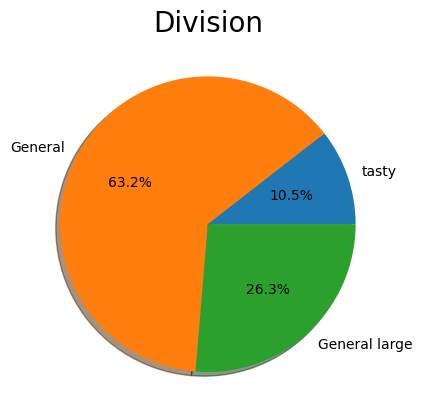

In [9]:
div_name, div_count = NameCount(df, 'Division Name')
#Department 
dep_name, dep_count = NameCount(df, 'Department Name')
#Class
class_name, class_count = NameCount(df, 'Class Name')
plt.pie(div_count, labels=div_name, autopct='%1.1f%%', shadow=True, radius= 1)
plt.title("Division", fontsize = 20)
plt.show()

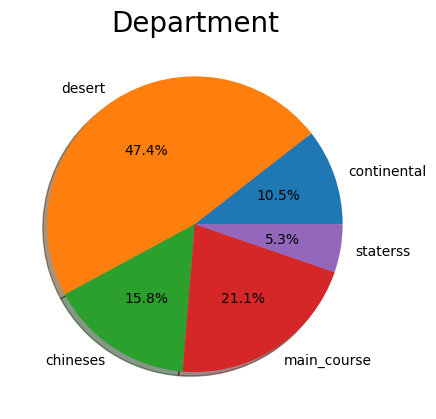

In [10]:
plt.pie(dep_count, labels=dep_name, autopct='%1.1f%%', shadow=True, radius= 1)
plt.title("Department", fontsize = 20)
plt.show()

In [11]:
#Taking random text such as Revies and Title
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
14,Pretty party dress with some issues,The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.,5
8,Flattering,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,5
6,Cagrcoal shimmer fun,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",5
16,"You need to be at least average height, or taller",I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,2
0,NaN,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5
5,Not for the very petite,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",4
4,Flattering shirt,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",5


In [12]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import sys
sys.path.append("stopwords")
import stopwords
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
with open('english.txt', 'r') as f:
    # Read the file contents and split it into a list of words
    words = f.read().split()

# Create a set of stopwords
stop_words = set(words)


def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Akhil
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [15]:
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

In [16]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

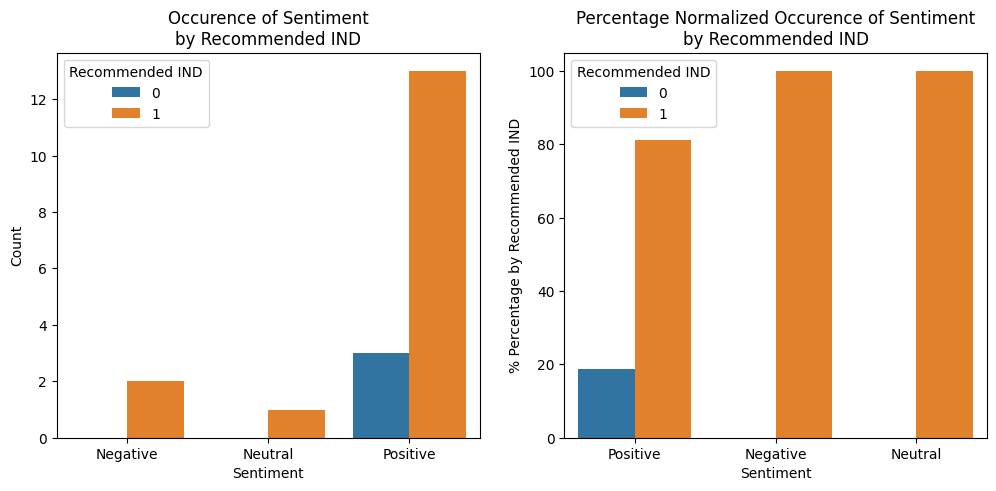

In [17]:
huevar = "Recommended IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

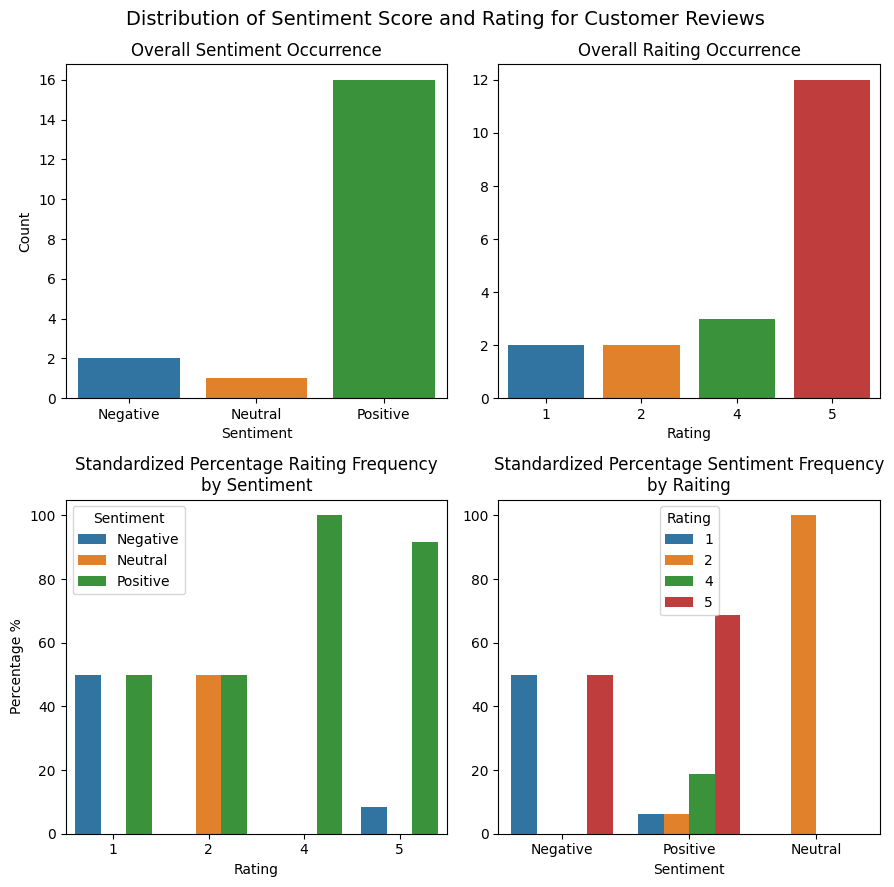

In [18]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

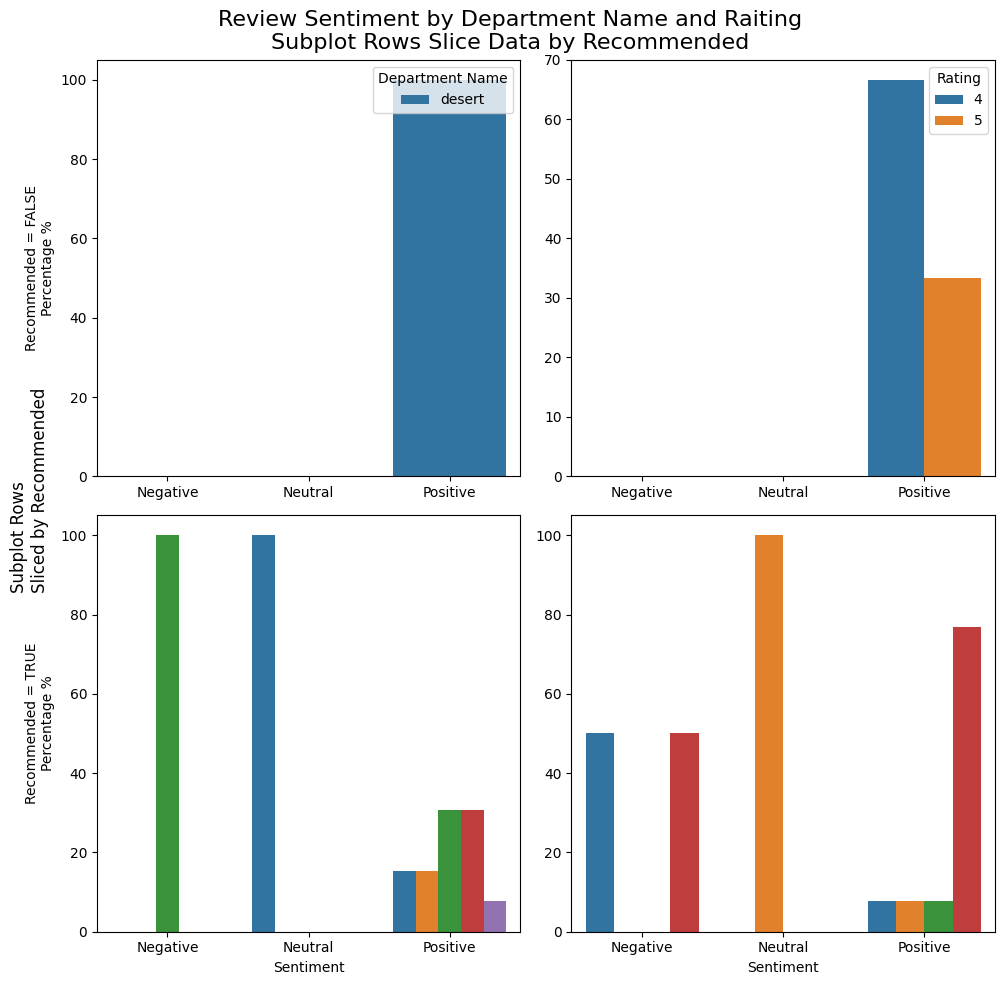

In [19]:
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

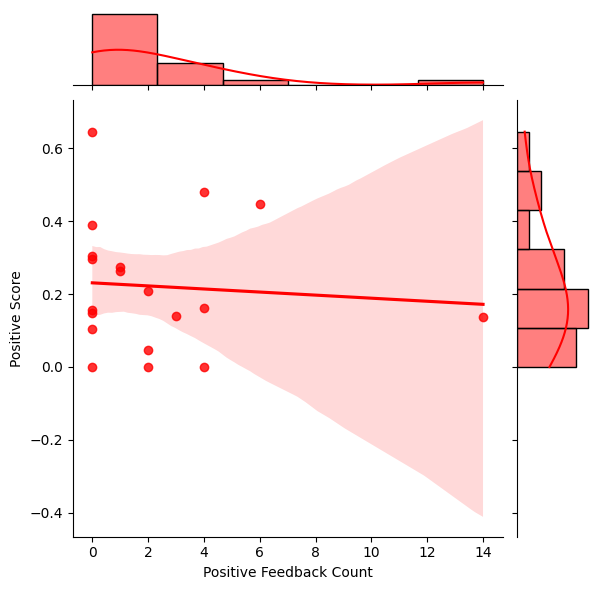

In [20]:
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

In [21]:
cv = df['Class Name'].value_counts()
df1=df['Rating'].value_counts().to_frame()
avgdf1 = df.groupby('Class Name').agg({'Rating': np.average})

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv[avgdf1.index],
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating & Class & Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig('3D_Scatter.png')

<Figure size 640x480 with 0 Axes>

In [23]:
df["Class"] = "Bad"
df.loc[df.Rating >= 3,["Class"]] = "Good"

In [24]:
for i in df.columns[df.isna().any()].tolist():
    print(i,'has',df[df[i].isna()==True].shape[0],'Null Values')

Title has 3 Null Values


In [25]:
df['Rating'].unique()

array([5, 1, 4, 2], dtype=int64)

In [26]:
def ret(rating):
    if rating>3:
        return 'Good'
    else:
        return 'Bad'

In [27]:
df = pd.read_csv("amazon_food_E_Commerce_Reviews.csv")
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Akhil
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
import sys
sys.path.append("stopwords")
import stopwords
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
with open('english.txt', 'r') as f:
    # Read the file contents and split it into a list of words
    words = f.read().split()

# Create a set of stopwords
stop_words = list(words)   
stop_words.extend(stop_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Akhil
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
df["Class"] = "Bad"
df.loc[df.Rating > 3,["Class"]] = "Good"
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] >3) | (df['Rating']<=3)]
X_review=rating_class['Review Text']
y=rating_class['Class']
import sys
sys.path.append("stopwords")
import stopwords
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
with open('english.txt', 'r') as f:
    # Read the file contents and split it into a list of words
    words = f.read().split()
    
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in words]
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)
print(len(bow_transformer.vocabulary_))
X_review = bow_transformer.transform(X_review)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

328


In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
predict=nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[1 0]
 [3 1]]


              precision    recall  f1-score   support

         Bad       0.25      1.00      0.40         1
        Good       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



In [33]:
rating_positive=df['Review Text'][3]
rating_positive
#prediction
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]
#actual
df['Class'][3]

'Bad'

In [34]:
rating_negative=df['Review Text'][2]
rating_negative
#prediction
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]
#actual
df['Class'][2]

'Good'

In [35]:
rating_random=df['Review Text'][4]
rating_random
#prediction
rating_random_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_random_transformed)[0]
#Actual
df['Class'][4]

'Good'